In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
path <- './data/femaleMiceWeights.csv'
dat <- read.csv(path)
control <- filter(dat, Diet=="chow") %>% select(Bodyweight) %>% unlist()
treatment <- filter(dat, Diet=="hf") %>% select(Bodyweight) %>% unlist()

In [3]:
# Getting the difference in average:
N <- length(treatment)
avg_diff <- mean(control) - mean(treatment)

In [4]:
# Estimating the T-stats:
standard_error <- sqrt((var(treatment) + var(control))/N)

In [5]:
t_stat <- avg_diff/standard_error

In [6]:
print(t_stat) 
print(avg_diff)
print(standard_error)

[1] -2.055174
[1] -3.020833
[1] 1.469867


In [7]:
# Evaluating what proportion of a guassian distribution is bigger than the tstats:
2 * (1 - pnorm(t_stat))

[1] 1.960138

In [8]:
install.packages("rafalib")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Lesson 7: T-approximations

In [9]:
# Loading the data:
dat <- read.csv(path)
control <- filter(dat, Diet=="chow") %>% select(Bodyweight) %>% unlist()
treatment <- filter(dat, Diet=="hf") %>% select(Bodyweight) %>% unlist()

In [10]:
# Automating the mean difference and standard error:
t_test <- t.test(treatment, control)
t_test


	Welch Two Sample t-test

data:  treatment and control
t = 2.0552, df = 20.236, p-value = 0.053
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04296563  6.08463229
sample estimates:
mean of x mean of y 
 26.83417  23.81333 


Notice that the T-test doesn't assume that population follows a normal distribution. Instead, it assumes that the population follows a t-distribution, which has heavier tails.

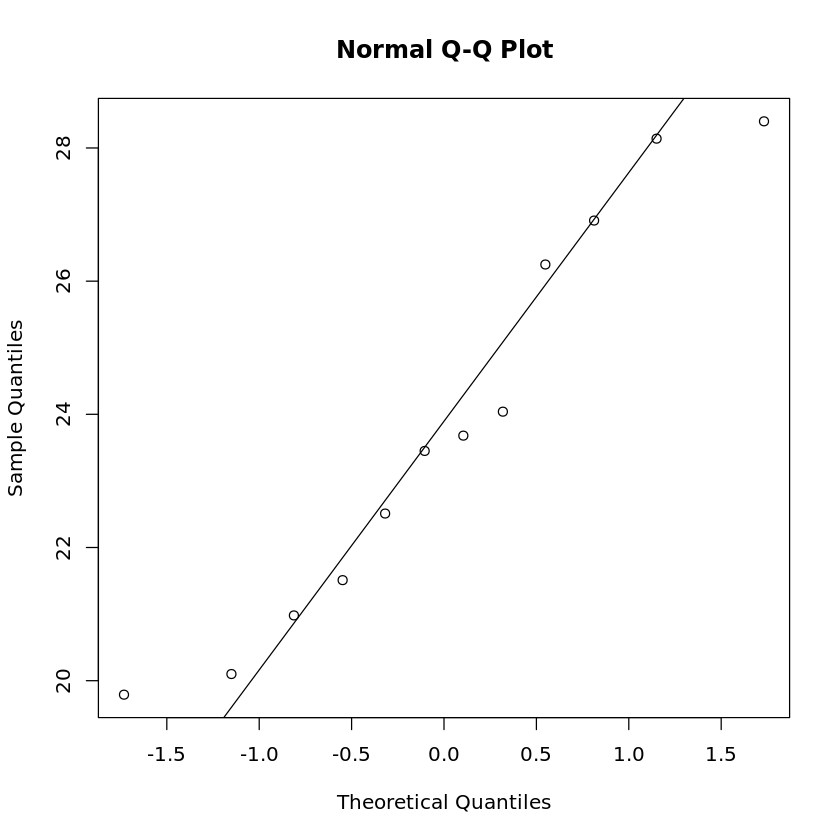

In [11]:
# Creating a qqplot:
qqnorm(control)
qqline(control)

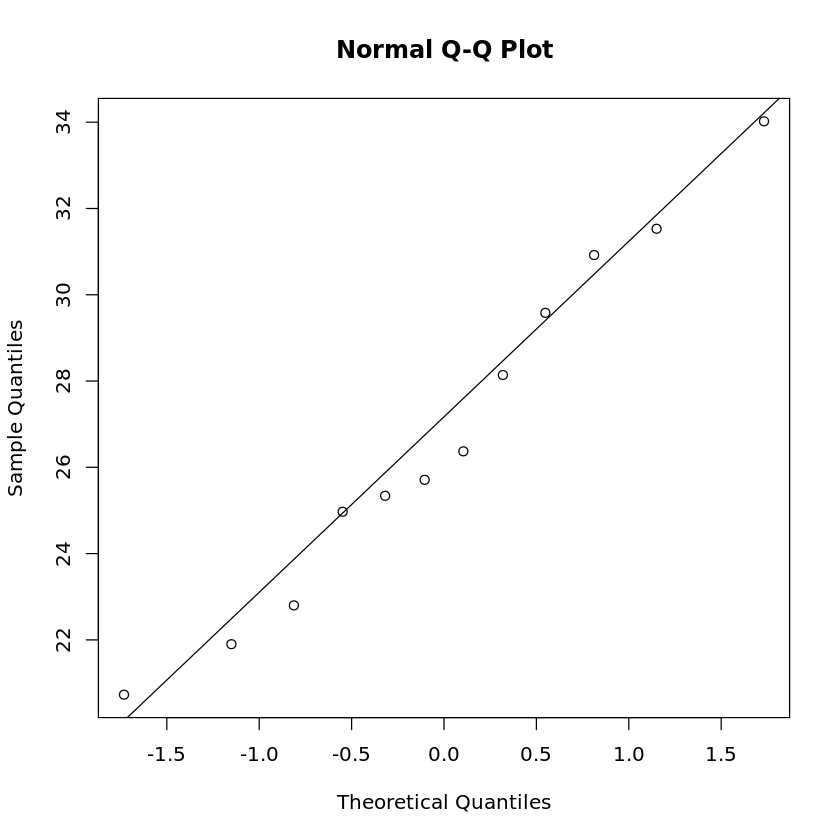

In [12]:
qqnorm(treatment)
qqline(treatment)

# Homework

In [13]:
## Loading the data:
library(dplyr)
library(rafalib)
path <- "./data/femaleMiceWeights.csv"
dat <- read.csv(path)

In [14]:
# Setting up the scenario:
roll_dice <- function() {
    n <- 100
    x <- sample(1:6, n, replace=TRUE)
    avg <- 1/6 # Theoretical change
    var <- avg*(1-avg)/n
    z <- (mean(x==6) - avg) / sqrt(avg * (1-avg)/n)
    return (z)
}
mean(x==6) # Getting the chance of getting a 6 in a 100 rolls

[1] 0

In [15]:
roll_dice()

[1] -0.1788854

In [16]:
# replicating the function:
set.seed(1)
results <- replicate(10000, roll_dice())

In [17]:
mean(abs(results) > 2)

[1] 0.0431

# Question 3:

In [18]:
x <- filter(dat, Diet=="chow") %>% select(Bodyweight) %>% unlist()
y <- filter(dat, Diet=="hf") %>% select(Bodyweight) %>% unlist()

In [19]:
mean(x)

[1] 23.81333

# Question 6:

In [24]:
# Calculating the sample average:
sd(x)

[1] 3.022541

# Question 7:

In [26]:
sd_x <- sd(x)
sd_y <- sd(y)
sqrt((sd_x^2 + sd_y^2)/12)

[1] 1.469867

In [25]:
sd(y)

[1] 4.097606

# Question 8:

In [27]:
N <- length(y)
obs <- mean(y) - mean(x)
se <- sqrt(
    var(y)/N + var(x)/N
)
tstat <- obs/se

In [28]:
se

[1] 1.469867

In [29]:
tstat

[1] 2.055174

In [30]:
p_value <- 2 * (1 - pnorm(tstat))

In [31]:
p_value

[1] 0.0398622

# Question 12

In [36]:
ttests <- t.test(x)
t.test(y)


	One Sample t-test

data:  y
t = 22.686, df = 11, p-value = 1.378e-10
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 24.23067 29.43766
sample estimates:
mean of x 
 26.83417 


In [33]:
ttests


	One Sample t-test

data:  x
t = 27.292, df = 11, p-value = 1.863e-11
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.89290 25.73376
sample estimates:
mean of x 
 23.81333 


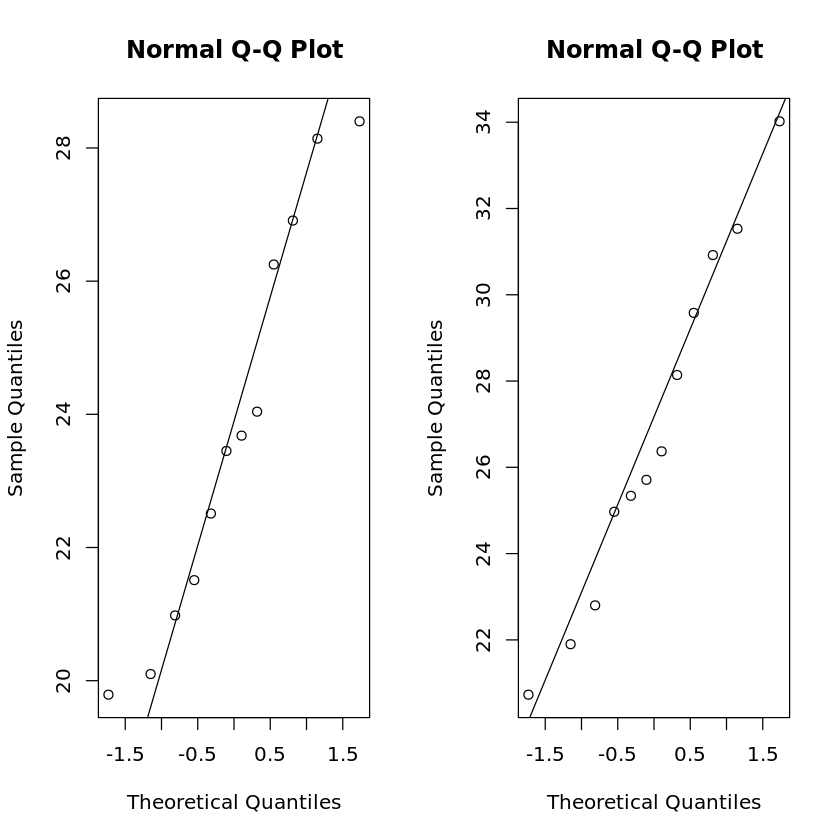

In [35]:
par(mfrow=c(1,2))
qqnorm(x)
qqline(x)
qqnorm(y)
qqline(y)